In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Websites = pd.read_csv("phishing_websites.csv")
Websites

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [3]:
Websites.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


## Logistic Regression

In [4]:
allvars = Websites.columns.drop(['url', 'status'])
design = MS(allvars)
X = design.fit_transform(Websites)
y = Websites.status == 'phishing'
glm = sm.GLM(y,
            X,
            family=sm.families.Binomial())
results = glm.fit()
summarize(results)

/Users/donghyeok/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/donghyeok/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/donghyeok/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if

/Users/donghyeok/anaconda3/lib/python3.11/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,z,P>|z|
intercept,-2.502000e-01,7.680000e-01,-0.326,0.745
length_url,1.480000e-02,9.000000e-03,1.670,0.095
length_hostname,8.400000e-02,1.300000e-02,6.297,0.000
ip,1.089700e+00,3.030000e-01,3.601,0.000
nb_dots,3.073000e-01,1.320000e-01,2.333,0.020
...,...,...,...,...
domain_age,-2.000000e-04,1.980000e-05,-8.194,0.000
web_traffic,-2.982000e-08,2.460000e-08,-1.214,0.225
dns_record,1.019500e+00,4.680000e-01,2.176,0.030
google_index,3.176800e+00,1.180000e-01,26.935,0.000


In [5]:
results.pvalues

intercept           7.446134e-01
length_url          9.484773e-02
length_hostname     3.035513e-10
ip                  3.171648e-04
nb_dots             1.967385e-02
                       ...      
domain_age          2.536786e-16
web_traffic         2.246885e-01
dns_record          2.953181e-02
google_index       8.551404e-160
page_rank          9.503845e-100
Length: 88, dtype: float64

In [6]:
# 확률 계산
probs = results.predict()
probs[:10]

array([4.81786270e-01, 9.34029982e-01, 9.99834607e-01, 1.05722151e-01,
       2.47861111e-04, 9.88461566e-01, 5.06402838e-03, 8.41613838e-01,
       6.77118360e-02, 1.05828015e-03])

In [7]:
# 확률이 50%보다 크면 피싱 사이트로 분류
labels = np.array(['legitimate']*11430)
labels[probs > 0.5] = 'phishing'

In [8]:
# 예측 결과
confusion_table(labels, Websites.status)

Truth,legitimate,phishing
Predicted,,
legitimate,5439,316
phishing,276,5399


In [9]:
# 올바르게 예측한 비율 
np.mean(labels == Websites.status)

0.9482064741907261

In [10]:
# training set, test set 분리하여 학습 후 예측
(X_train, X_test, y_train, y_test) = train_test_split(X,  
                                                      y,
                                                      train_size=0.5,
                                                      random_state=0)

In [11]:
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(X_test)

In [12]:
L_train = np.where(y_train==1, 'phishing', 'legitimate')
L_test = np.where(y_test==1,'phishing','legitimate')

In [13]:
y_pred = np.array(['legitimate']*5715)
y_pred[probs>0.5] = 'phishing'
confusion_table(y_pred, L_test)

Truth,legitimate,phishing
Predicted,,
legitimate,2731,170
phishing,145,2669


In [14]:
np.mean(y_pred == L_test)

0.9448818897637795

## K-Nearest Neighbors

In [15]:
# K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,legitimate,phishing
Predicted,,
legitimate,2337,408
phishing,539,2431


In [16]:
np.mean(knn1_pred == L_test)

0.8342957130358705

In [17]:
for K in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, L_train).predict(X_test)
    print(f'K={K} accuracy : {np.mean(knn_pred == L_test)}')

K=2 accuracy : 0.826421697287839
K=3 accuracy : 0.8391951006124234
K=4 accuracy : 0.8358705161854768
K=5 accuracy : 0.8342957130358705
K=6 accuracy : 0.831846019247594
K=7 accuracy : 0.8302712160979877
K=8 accuracy : 0.8311461067366579
K=9 accuracy : 0.8334208223972004
K=10 accuracy : 0.8267716535433071
K=11 accuracy : 0.8290463692038496
K=12 accuracy : 0.8239720034995626
K=13 accuracy : 0.8230971128608924
K=14 accuracy : 0.8237970253718285
K=15 accuracy : 0.8225721784776903
K=16 accuracy : 0.8230971128608924
K=17 accuracy : 0.8216972878390201
K=18 accuracy : 0.8204724409448819
K=19 accuracy : 0.820647419072616
K=20 accuracy : 0.8192475940507437


In [18]:
# K=100
knn = KNeighborsClassifier(n_neighbors=100)
knn_pred = knn.fit(X_train, L_train).predict(X_test)
np.mean(knn_pred == L_test)

0.7863517060367454

## L1 Regularization

In [19]:
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
K = 10
kfold = skm.KFold(K, random_state=0, shuffle=True)
lambdas = 10**np.linspace(4, -2, 60)

In [21]:
# 최적의 람다 값을 구하기 위한 GridSearch
logi = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('logi', logi)])
param_grid = {'logi__C': 1/lambdas}
grid = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logi',
                                        LogisticRegression(max_iter=5000,
                                                           penalty='l1',
                                                           solver='saga'))]),
             param_grid={'logi__C': array([1.00000000e-04, 1.26384820e-04, 1.59731228e-04, 2.01876025e-04,
       2.55140652e-04, 3.22459055e-04, 4.07539297e-04, 5.15067808e-04,
       6.50967523e-...
       4.58159767e-01, 5.79044398e-01, 7.31824222e-01, 9.24914728e-01,
       1.16895182e+00, 1.47737765e+00, 1.86718109e+00, 2.35983347e+00,
       2.98247129e+00, 3.76939098e+00, 4.76393801e+00, 6.02089449e+00,
       7.60949669e+00, 9.61724871e+00, 1.21547425e+01, 1.53617495e+01,
       1.94149195e+01, 2.45375111e+01, 3.10116893e+01, 3.91940677e+01,
       4.95353521e+01, 6.26051657e+01, 7.91234262e+01, 1.00000000e+02])},
             scoring='accuracy')

In [22]:
# 최적의 람다 값
C_opt = grid.best_params_['logi__C']
lambda_opt = 1 / C_opt
lambda_opt

0.1660882782627713

In [23]:
# 최적의 람다 값으로 Logistic Regression 모델 재학습
logi_opt = LogisticRegression(penalty='l1', solver='saga', C=C_opt, max_iter=5000)
pipe_logi = Pipeline(steps=[('scaler', scaler), ('logi', logi_opt)])
result_logi = pipe_logi.fit(X_train, y_train)

In [24]:
# coefficient 값 출력
coeffs_opt = result_logi.named_steps['logi'].coef_
coeffs_opt

array([[ 0.00000000e+00,  4.99613528e-02,  8.60015540e-01,
         4.25724790e-01,  5.60938636e-01, -1.00826616e+00,
         7.23364741e-01,  2.84910665e-01, -7.20352997e-01,
         0.00000000e+00,  4.53385434e-01, -7.07246474e-01,
        -1.81952291e-02,  2.39933034e-01,  2.58183383e-01,
         0.00000000e+00,  8.18711494e-01, -2.96646623e-01,
         1.01605128e+00,  0.00000000e+00, -3.14375766e-01,
        -1.18397963e+00, -1.53271324e-01,  2.35386395e-01,
         6.94948753e-02, -3.80329279e-01,  5.11383364e-02,
         7.97787851e-01,  6.54638341e-02, -2.20667075e-01,
         1.86243929e-02,  2.67853105e-01, -1.43308615e-01,
        -3.75059387e-01, -4.84846454e-02,  1.81157393e-02,
         3.01274115e-01, -7.10707448e-02,  3.44144899e-02,
         0.00000000e+00,  3.13160650e-01, -1.55962337e-01,
         2.46413339e-01,  2.52523969e-01,  4.19067130e-01,
         3.44003592e+00,  3.93371643e-02, -1.09466188e-02,
        -8.26829477e-01, -9.61493284e-01, -6.07023288e-0

In [25]:
# 선택된 feature 출력
non_zero_features = [Websites.columns[i] for i in range(88) if coeffs_opt[0][i] != 0]
print(len(non_zero_features), non_zero_features)

78 ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags'

In [26]:
coeffs = []

for alpha in lambdas:
    logi = LogisticRegression(penalty='l1', solver='saga', C=1/alpha, max_iter=5000)
    scaler = StandardScaler(with_mean=True, with_std=True)
    pipe = Pipeline(steps=[('scaler', scaler), ('logi', logi)])
    pipe.fit(X_train, y_train)
    coeffs.append(pipe.named_steps['logi'].coef_.flatten())

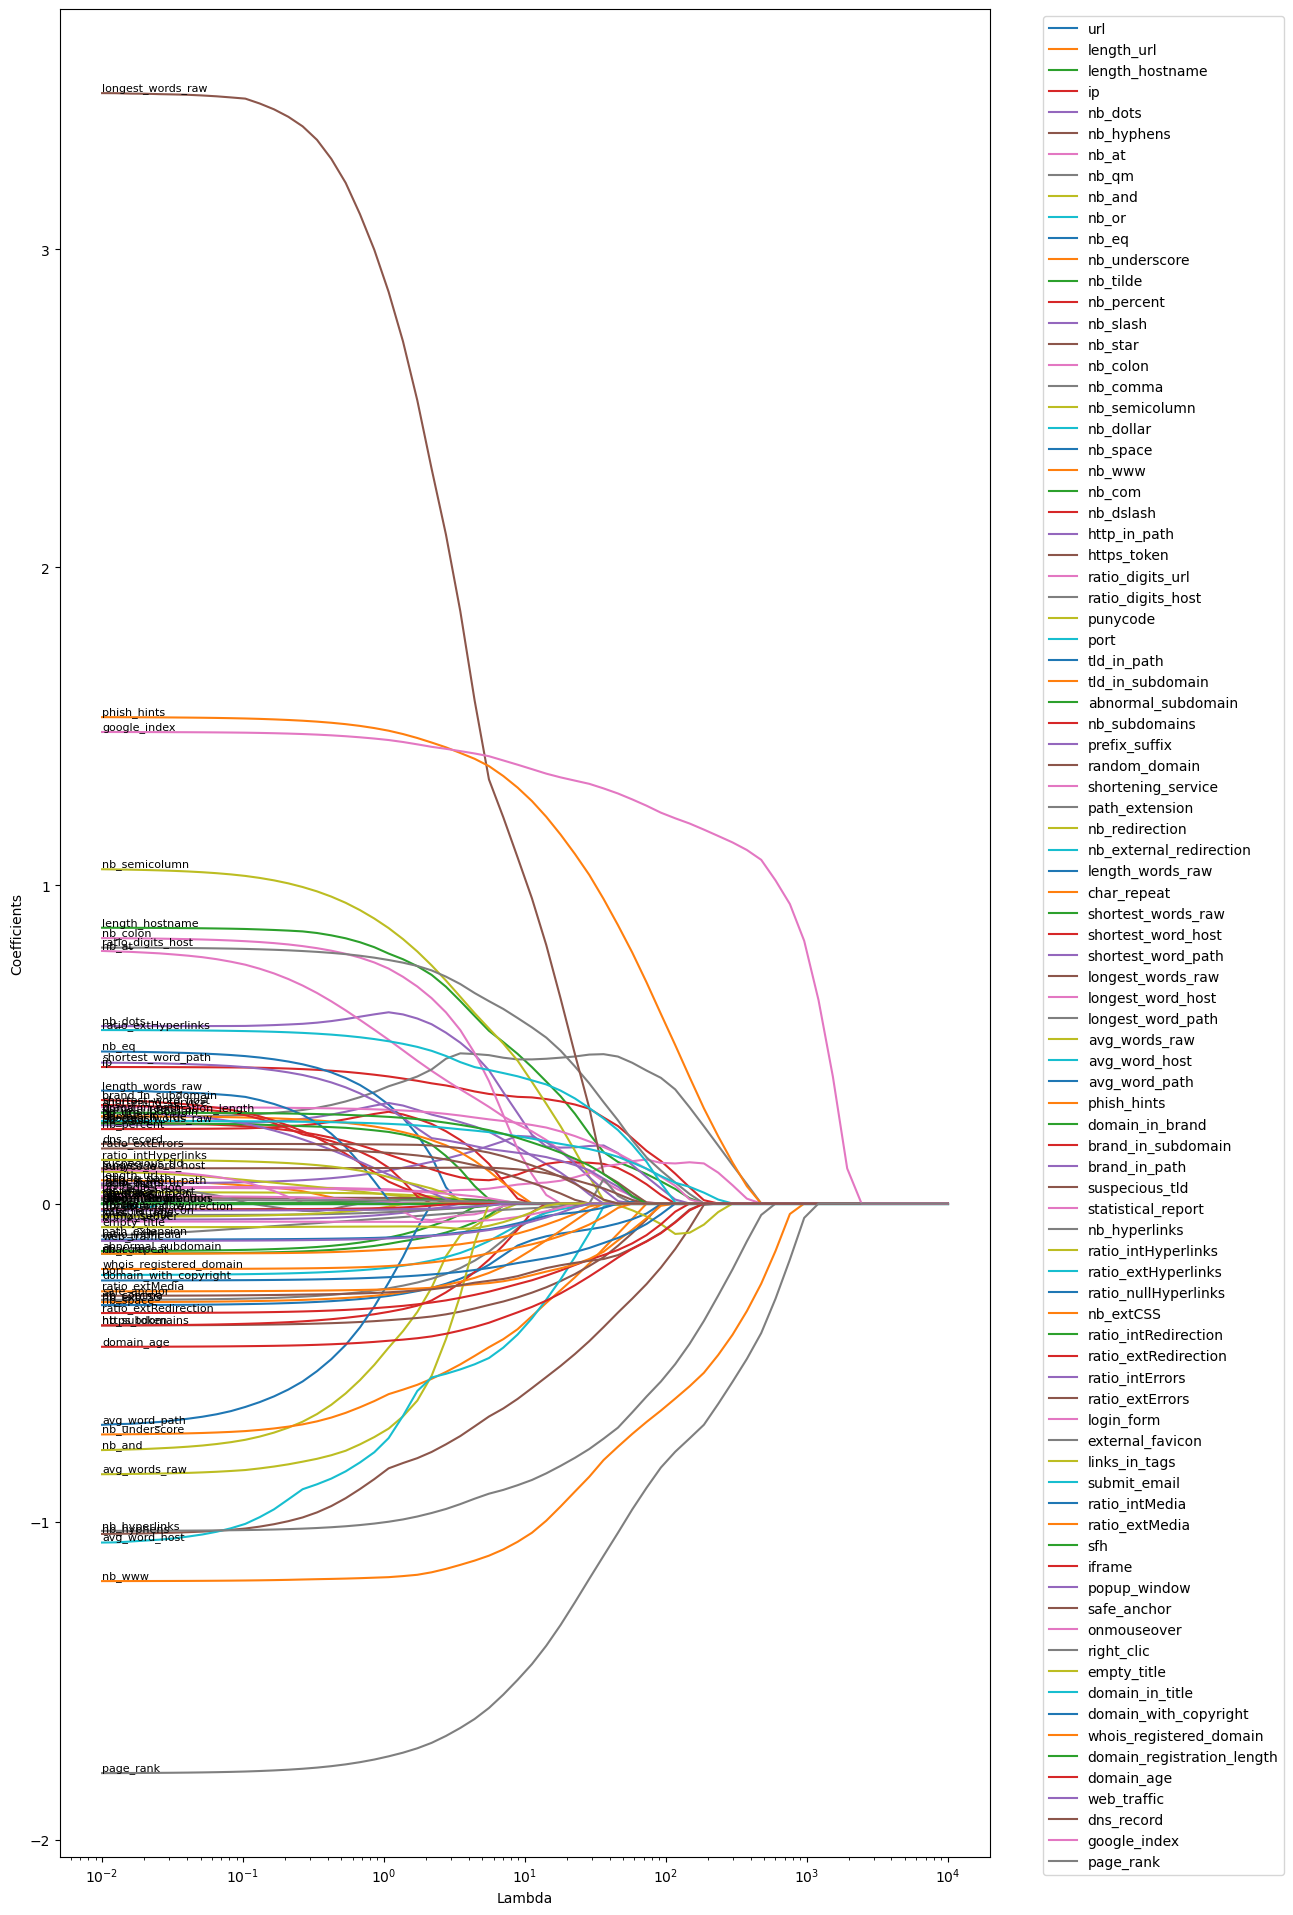

In [27]:
coeffs = np.array(coeffs)

plt.figure(figsize=(12,24))
for i in range(coeffs.shape[1]):
    plt.plot(lambdas, coeffs[:, i], label=Websites.columns[i])
    plt.text(lambdas[-1], coeffs[-1, i], Websites.columns[i], fontsize=8, verticalalignment='bottom')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
y_pred = pipe_logi.predict(X_test)
np.mean(y_pred == y_test)

0.9459317585301837

In [29]:
# 람다 값을 높여서 다시 수행
logi_opt = LogisticRegression(penalty='l1', solver='saga', C=0.005, max_iter=5000)
pipe_logi = Pipeline(steps=[('scaler', scaler), ('logi', logi_opt)])
result_logi = pipe_logi.fit(X_train, y_train)
coeffs2 = result_logi.named_steps['logi'].coef_
coeffs2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.03001168e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.26134696e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.16148849e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.21515007e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [30]:
y_pred = pipe_logi.predict(X_test)
np.mean(y_pred == y_test)

0.9058617672790901

In [31]:
# 선택된 feature 출력
non_zero_features = [Websites.columns[i] for i in range(88) if coeffs2[0][i] != 0]
print(len(non_zero_features), non_zero_features)

10 ['ip', 'nb_qm', 'nb_www', 'ratio_digits_url', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'domain_in_title', 'google_index', 'page_rank']
